In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
!pip install lightgbm

  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)


In [4]:
train=pd.read_csv("C:/Users/Zehra/Desktop/Python/Food_Demand_Forecasting/train.csv")
centers=pd.read_csv("C:/Users/Zehra/Desktop/Python/Food_Demand_Forecasting/fulfilment_center_info.csv")
test=pd.read_csv("C:/Users/Zehra/Desktop/Python/Food_Demand_Forecasting/test.csv")

In [5]:
meal=pd.read_excel("C:/Users/Zehra/Desktop/Python/Food_Demand_Forecasting/meal_info_.xlsx")

In [6]:
df = pd.merge(train, centers, on='center_id')

In [7]:
all_df = pd.merge(df, meal, on='meal_id')

In [8]:
all_df.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai


<AxesSubplot:xlabel='week', ylabel='num_orders'>

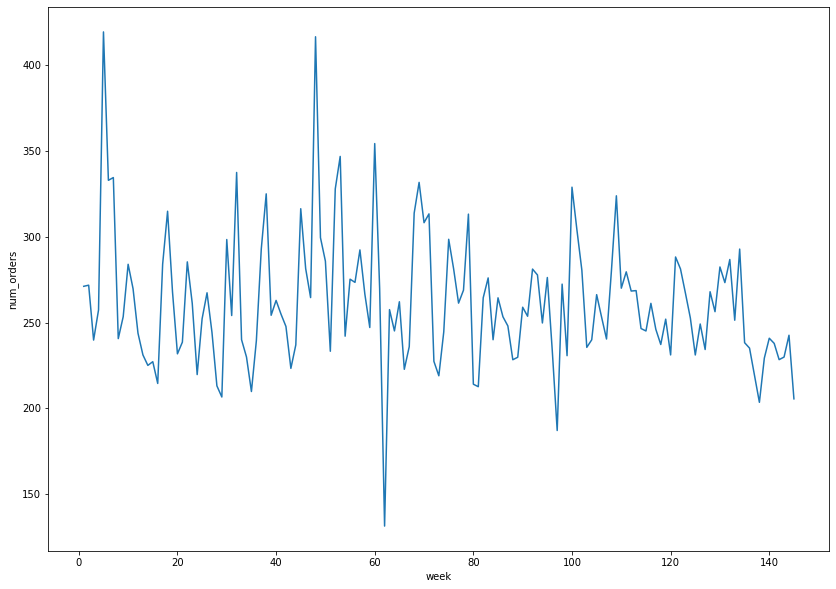

In [9]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=all_df, x="week", y="num_orders",ci=None)

In [10]:
table = pd.pivot_table(all_df, values='num_orders', index=['week'],
                    columns=['center_type'], aggfunc=np.sum)

Text(0, 0.5, 'num_orders')

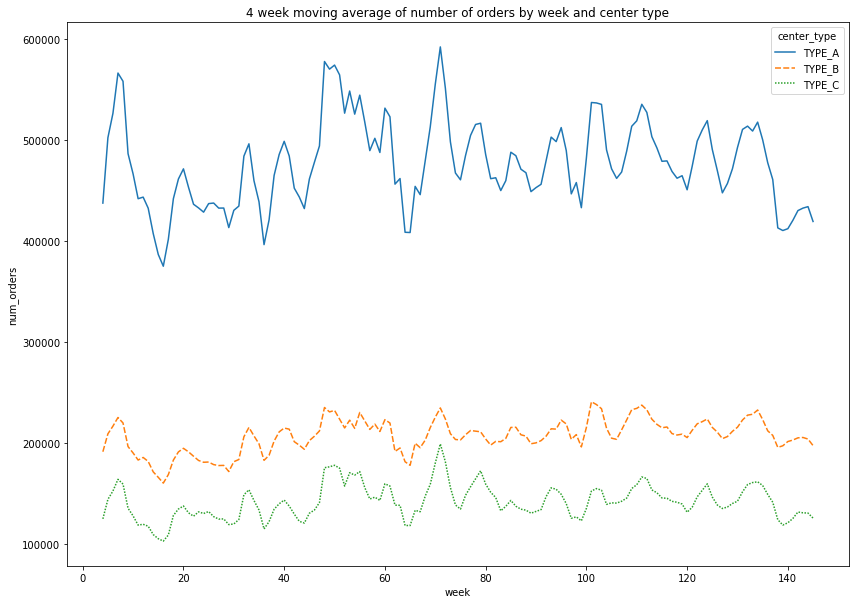

In [11]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=table.rolling(window=4).mean()).set(title='4 week moving average of number of orders by week and center type')
plt.ylabel('num_orders')

In [12]:
table1 = pd.pivot_table(all_df, values='num_orders', index=['week'],
                    columns=['cuisine'], aggfunc=np.sum)

Text(0, 0.5, 'num_orders')

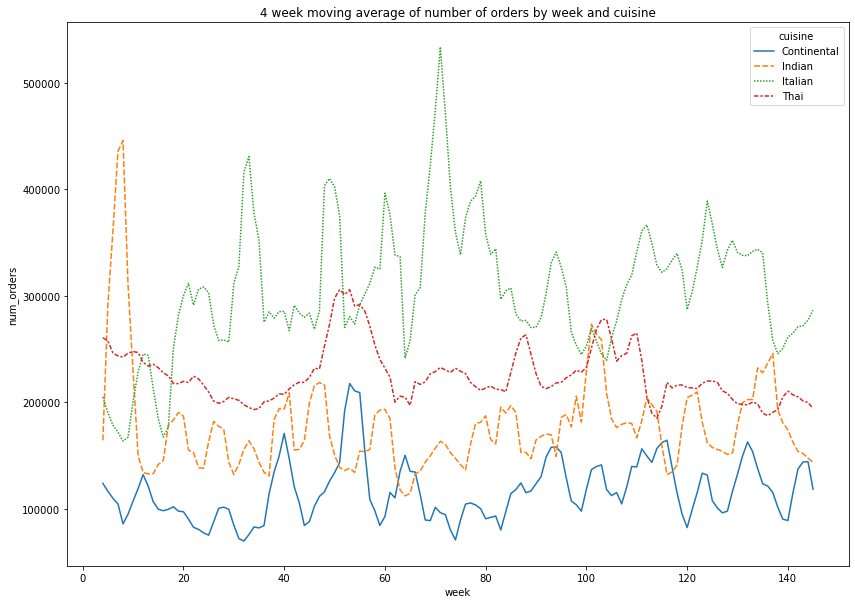

In [13]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=table1.rolling(window=4).mean()).set(title='4 week moving average of number of orders by week and cuisine')
plt.ylabel('num_orders')

### Label Encoder

In [14]:
le = LabelEncoder()

all_df["center_type"] = le.fit_transform(all_df["center_type"])
all_df["category"] = le.fit_transform(all_df["category"])
all_df["cuisine"] = le.fit_transform(all_df["cuisine"])

In [15]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


# Model

In [16]:
all_df = all_df.drop(["id"],axis=1)

In [17]:
y = all_df["num_orders"]
x= all_df.drop(["num_orders"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Decision Tree Regressor

In [26]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [27]:
print("R2 score  :",r2_score(y_test, dt_pred))
print("MSE score  :",mean_squared_error(y_test, dt_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, dt_pred)))

R2 score  : 0.6956748067711322
MSE score  : 46874.48432573792
RMSE:  216.50516004413825


### Random Forest Regressor

In [24]:
rf = RandomForestRegressor(max_depth=3)
rf_model= rf.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [25]:
print("R2 score  :",r2_score(y_test, rf_pred))
print("MSE score  :",mean_squared_error(y_test, rf_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, rf_pred)))

R2 score  : 0.26814204361542593
MSE score  : 112726.33705161531
RMSE:  335.7474304467799


### Linear Regression

In [21]:
lr = LinearRegression()
lr_model= lr.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

In [22]:
print("R2 score  :",r2_score(y_test, lr_pred))
print("MSE score  :",mean_squared_error(y_test, lr_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, lr_pred)))

R2 score  : 0.24593380044520996
MSE score  : 116147.01982631275
RMSE:  340.80349151132936


### LightGBM

In [18]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(x_train, y_train)
lgbm_pred = lgbm_model.predict(x_test)

In [19]:
print("R2 score  :",r2_score(y_test, lgbm_pred))
print("MSE score  :",mean_squared_error(y_test, lgbm_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, lgbm_pred)))

R2 score  : 0.8081136493982012
MSE score  : 29555.79733039946
RMSE:  171.9179959469033
